<a href="https://www.kaggle.com/code/zainabs1/from-data-to-decisions-superstore-sales-analysis?scriptVersionId=291460778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [2]:
#load the dataset
df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding="latin1")

In [3]:
#inspecting the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#checking for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

## Data Cleaning

### 1. Fixing Naming Convention

In [8]:
new_column_names = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']
df.columns = new_column_names

In [9]:
print(df.columns.tolist())

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


### 2. Fixing Data Types

In [10]:
#checking column data types
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub-category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [11]:
#columns that should be `Date` type
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')

#columns that should be `string` type
df['postal_code'] = df['postal_code'].astype(str)
df['postal_code'] = df['postal_code'].apply(lambda x: x.zfill(5) if len(x) < 5 else x) #putting back the leading zero

## Exploratory Data Analysis

### 1. General Analysis

#### 1.1. Regional Performance
We aim here to identify the region that is most profitable.

,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
South,391721.9050,46749.4303
Central,501239.8908,39706.3625


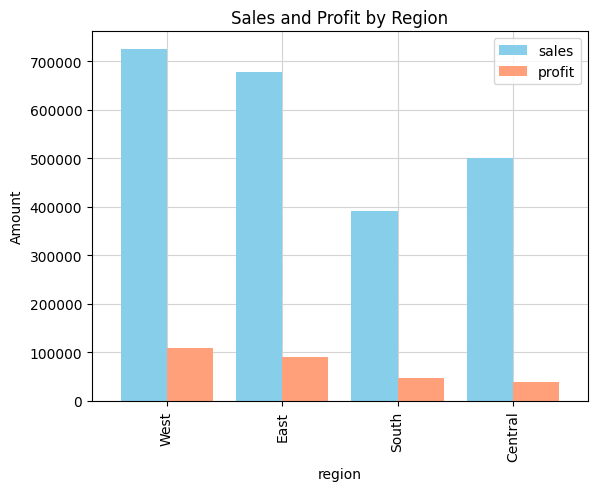

In [12]:
#reporting
regional_summary = df.groupby('region')[['sales', 'profit']].sum().sort_values('profit', ascending=False)
display(regional_summary)

#visualization
ax = regional_summary.plot(kind='bar', color=['skyblue', 'lightsalmon'], width=0.8, zorder=2)
ax.grid(True, which='both', color='lightgrey', zorder=0)
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.show()

***Insight***: It is obviously observed that the `West` region **dominates in both Sales and Profits**. Follwoed by the `East` region.

#### 1.2. Category & Sub-Category Anlaysis
In this subsection, we will determine which categories and sub-categories should be prioritized and which may require further evaluation.

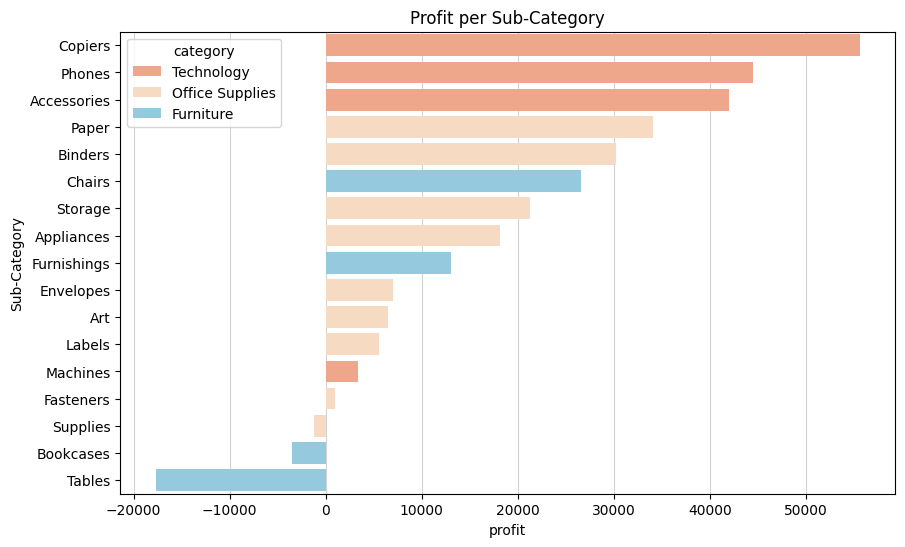

In [13]:
category_summary = df.groupby(['category', 'sub-category'])[['sales', 'profit']].sum().reset_index()
category_summary = category_summary.sort_values('profit', ascending=False)

#defining a color for each category
category_colors = {
    'Furniture': 'skyblue',
    'Technology': 'lightsalmon',
    'Office Supplies': 'peachpuff'
}

#visualization
plt.figure(figsize=(10,6))
ax = sns.barplot(data=category_summary, x='profit', y='sub-category', hue='category', dodge=False, palette=category_colors, zorder=2)
ax.grid(True, axis='x', color='lightgrey', zorder=1.5)
plt.title('Profit per Sub-Category')
plt.ylabel('Sub-Category')
plt.show()

***Insights***:
1. The `Technology` catgeory is **the most profitable category**, followed by `Office Supplies`, while the `Furniture` category needs review.
2. The `Copiers`, `Phones`, and `Accessories` perform **the best** among all sub-categories.
3. On th eother hand, `Tables`, `Bookcases`, and `Supplies` **do not generate any profit.

#### 1.3. Customer Segment Analysis
Now, we identify the most profitable customer segment.

,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


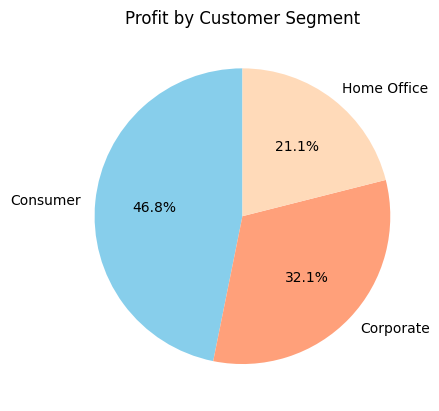

In [14]:
#reporting
segment_summary = df.groupby('segment')[['sales', 'profit']].sum().sort_values('profit', ascending=False)
display(segment_summary)

#visualization
segment_summary['profit'].plot(kind='pie', colors=['skyblue', 'lightsalmon', 'peachpuff'], autopct='%1.1f%%', startangle=90)
plt.title('Profit by Customer Segment')
plt.ylabel('')
plt.show()

***Insight***: `Consumer` **is the most profitable segment**, followed by `Corporate`, and finally the `Home Office` segment.

#### 1.4. Top & Bottom Products
This sub-section will help identifying which products to focus on or discontinue.

In [15]:
#reporting
products_summary = df.groupby('product_name')[['sales','profit']].sum().sort_values('profit', ascending=False)

#top 10
print("\n\n   ->   TOP 10 PRODUCTS BY PROFIT")
display(products_summary.head(10))

#bottom 10 
print("\n\n   ->   BOTTOM 10 PRODUCTS BY PROFIT")
display(products_summary.tail(10))



   ->   TOP 10 PRODUCTS BY PROFIT


,sales,profit
product_name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7753.0390
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
Canon PC1060 Personal Laser Copier,11619.834,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766
Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.290,3696.2820
Ibico EPK-21 Electric Binding System,15875.916,3345.2823




   ->   BOTTOM 10 PRODUCTS BY PROFIT


,sales,profit
product_name,,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,1706.250,-1148.4375
Balt Solid Wood Round Tables,6518.754,-1201.0581
Martin Yale Chadless Opener Electric Letter Opener,16656.200,-1299.1836
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,-1811.0784
GBC DocuBind P400 Electric Binding System,17965.068,-1878.1662
Bush Advantage Collection Racetrack Conference Table,9544.725,-1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.640,-2876.1156
Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730


### 2. Advanced Analysis

#### 2.1. Time-Series Analysis (Sales & Profit Trends)
This sub-section focuses on how both sales and profit evolve over time.

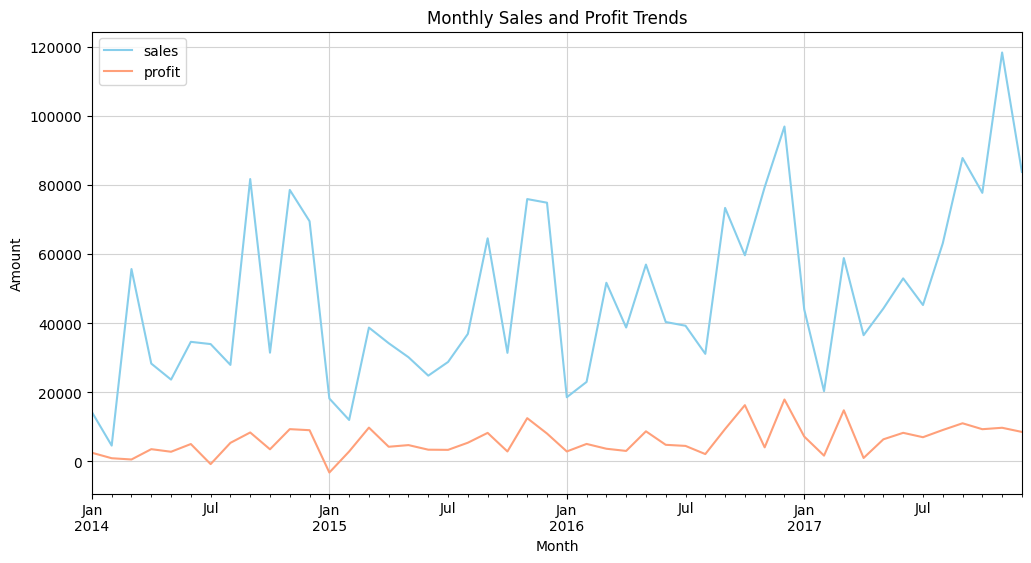

In [16]:
#creating necessary time features
df['order_year'] = df['order_date'].dt.year
df['order_quarter'] = df['order_date'].dt.to_period('Q')
df['order_month'] = df['order_date'].dt.to_period('M')

#reporting
monhly_trend = df.groupby('order_month')[['sales', 'profit']].sum()

#visualization
ax = monhly_trend.plot(kind='line', color=['skyblue', 'lightsalmon'], figsize=(12,6))
ax.grid(True, which='major', color='lightgrey')
plt.title('Monthly Sales and Profit Trends')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.show()

***Insights***:
1. Sales tend to rise sharply several times each year, with noticable peaks in **November** and **December**. However, sales consistently dip early each year, particularly in **January** and **February**.
2. Profit trends remain relatively steady over time, though there are few months that standout. **January 2015** shows the **lowest profit points**, while **October and December 2016** show some of the strongest profit months.

#### 2.2. Profit Margin Analysis

category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: profit_margin, dtype: float64

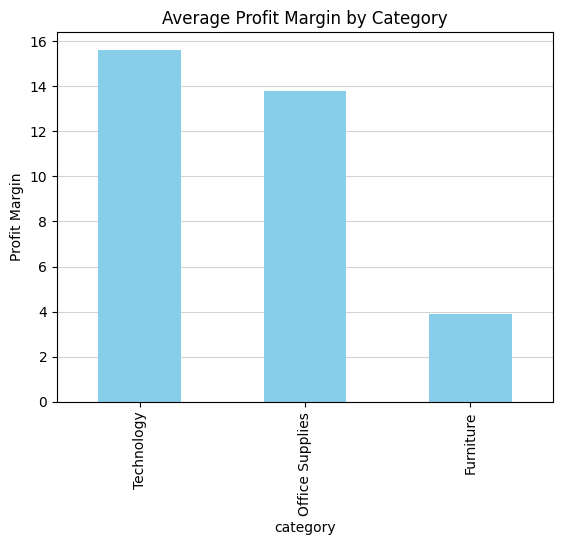

In [17]:
#reporting
df['profit_margin'] = (df['profit'] / df['sales']) * 100
margin_by_category = df.groupby('category')['profit_margin'].mean().sort_values(ascending=False)
display(margin_by_category)

#visualization
ax = margin_by_category.plot(kind='bar', color='skyblue', zorder=2)
ax.grid(True, axis='y', color='lightgrey', zorder=1)
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.show()

***Insight***: Technology **has the highest profit margine**, making it **the most profitable category overall**. Office Supplies also performs well, in contrast to Furniture, which has a **significantly lower profit margin**.

#### 2.3. Discount Impact Analysis

,sales,profit
discount_flag,,
0,226.742074,66.900292
1,232.735256,-6.657156


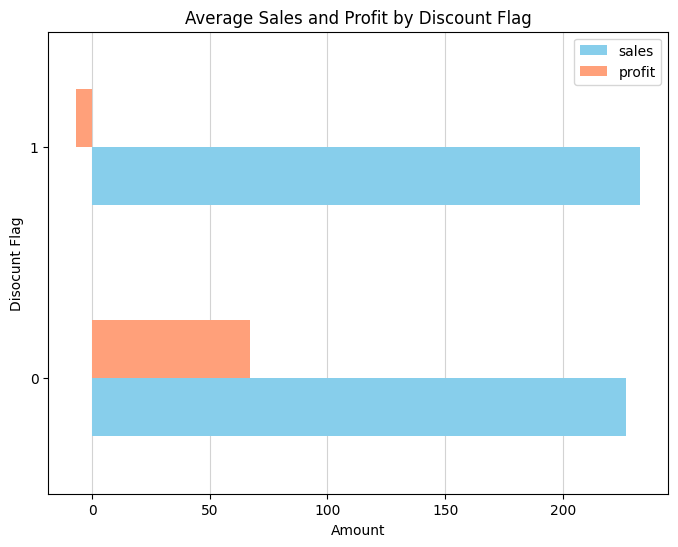

In [18]:
#reporting
df['discount_flag'] = (df['discount']>0).astype(int)
discount_summary = df.groupby('discount_flag')[['sales','profit']].mean()
display(discount_summary)

#visualization
ax = discount_summary.plot(kind='barh', color=['skyblue','lightsalmon'], zorder=2, figsize=(8,6))
ax.grid(True, axis='x', color='lightgrey', zorder=1)
plt.title('Average Sales and Profit by Discount Flag')
plt.ylabel('Disocunt Flag')
plt.xlabel('Amount')
plt.show()

***Insights***:
1. Offering a `discount` **does not significantly increase the average sales amount** per transaction.
2. Conversely, `discount` **heavily reduces profit** per transaction.
3. Discounts **may not be necessary**, because they don't increase revenue but they *do* **kill profits**.

### 3. Final Analysis using a Heatmap: Profit by Region and Category
The aim of this final analysis is to confirm previous findings, as well as identify profitability hotspots.

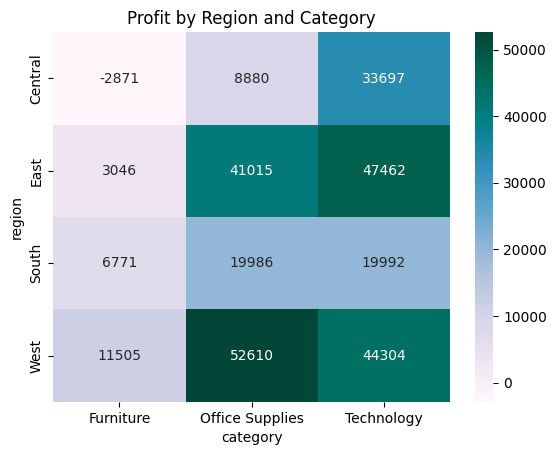

In [19]:
pt = df.pivot_table(index='region', columns='category', values='profit', aggfunc='sum')
sns.heatmap(pt, annot=True, fmt='.0f', cmap='PuBuGn')
plt.title('Profit by Region and Category')
plt.show()

***Insight***: The above result confirms the previous findings:
1. Technology **dominates** among categories, while Furniture lack behind.
2. The West region is **in the lead**.

Further investigations could be done to explain the profit distribution by `region` and `category`, as it obviously provides valuable insights.

## Feature Engineering
Here, we create the remaining **derived fields** needed for BI modeling.

In [20]:
#shipping speed
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

#profitability flag
df['is_profitable'] = df['profit'] > 0

#high discount bucket
df['discount_bucket'] = pd.cut(
    df['discount'], 
    bins=[-0.01, 0, 0.10, 0.20, 1.00],
    labels=["No Discount", "Low", "Medium", "High"]
)

## Data Model Transformation (Optional)
This section transforms the single flat table into a **fact table** and several **dimension tables** following the `Star Schema`.

In [21]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,discount,profit,order_year,order_quarter,order_month,profit_margin,discount_flag,shipping_days,is_profitable,discount_bucket
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,2016,2016Q4,2016-11,16.00,0,3,True,No Discount
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,2016,2016Q4,2016-11,30.00,0,3,True,No Discount
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,2016,2016Q2,2016-06,47.00,0,4,True,No Discount
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,2015,2015Q4,2015-10,-40.00,1,7,False,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,2015,2015Q4,2015-10,11.25,1,7,True,Medium


### 1. dim_customer

In [22]:
#customer dimension table
customer = df[['customer_id', 'customer_name', 'segment']]
customer.drop_duplicates(inplace=True)

/tmp/ipykernel_13/2749071016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.drop_duplicates(inplace=True)


### 2. dim_product

In [23]:
#product dimension table
product = df[['product_id', 'product_name', 'category', 'sub-category']]
product.drop_duplicates(inplace=True)

/tmp/ipykernel_13/3889909637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product.drop_duplicates(inplace=True)


### 3. dim_order

In [24]:
order = df[['order_id', 'order_date']]
order.drop_duplicates(inplace=True)

/tmp/ipykernel_13/2076967000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order.drop_duplicates(inplace=True)


### 4. dim_geo

In [25]:
#geography dimension table
geography = df[['country', 'city', 'state', 'region', 'postal_code']].drop_duplicates().reset_index(drop=True)

#generate a GeoID as the GeographyKey
geography['geography_key'] = geography.index + 1 #start from 1

#reorder columns
geography = geography[['geography_key', 'country', 'city', 'state', 'region', 'postal_code']]

### 5. dim_shipping

In [26]:
#shipping dimension table
shipping = df[['ship_date', 'ship_mode', 'shipping_days']].drop_duplicates().reset_index(drop=True)

#generate a ShipmentID as the ShipmentKey
shipping['shipping_key'] = shipping.index + 1 #start from 1

#reorder columns
shipping = shipping[['shipping_key', 'ship_date', 'ship_mode', 'shipping_days']]

### 6. fact_sales

In [27]:
#sales fact table

# merge ShipmentKey into Sales
# use a combination of both Ship Date and Ship Mode
df = pd.merge(
    df,
    shipping[['ship_date', 'ship_mode', 'shipping_key']],
    on = ['ship_date', 'ship_mode'],
    how = 'left'
)

# merge Geography key into Sales
# use a comination of both Country and City
df = pd.merge(
    df,
    geography[['country', 'city', 'state', 'postal_code', 'geography_key']],
    on = ['country', 'city', 'state', 'postal_code'],
    how = 'left'
)

sales = df[['row_id', 'order_id', 'order_date', 'ship_date', 'shipping_key', 'customer_id', 'geography_key', 'product_id', 'sales', 'quantity', 'discount', 'discount_flag', 'discount_bucket', 'profit', 'profit_margin']]

In [28]:
#save as csv
customer.to_csv('dim_customer.csv', index=False)
product.to_csv('dim_product.csv', index=False)
order.to_csv('dim_order.csv', index=False)
geography.to_csv('dim_geo.csv', index=False)
shipping.to_csv('dim_shipping.csv', index=False)
sales.to_csv('fact_sales.csv', index=False)